<a href="https://colab.research.google.com/github/michellegallegoabril/EJERCICIOS-Y-PARCIALES/blob/main/3_Serie%26TransformadaFourier/Detector_Genero_Musical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import joblib

# Ruta al archivo del modelo en Google Colab
ruta_al_modelo = '/content/drive/MyDrive/Colab Notebooks/rock_vs_house.pkl'  # Ajusta la ruta y el nombre del archivo según tu ubicación

# Carga el modelo desde el archivo .pkl
modelo_cargado = joblib.load(ruta_al_modelo)
modelo_cargado.keys()
base_datos= modelo_cargado['Xw_']
genero_bd = modelo_cargado['label']
print("tamaño base de datos :",base_datos.shape)
print("tamaño del label generos: ",genero_bd.shape)

tamaño base de datos : (140, 120001)
tamaño del label generos:  (140, 1)


In [4]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 107.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 8.6 MB/s eta 0:00:00
  Created 

In [5]:
import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [13]:
link_= ["https://youtu.be/UIl27cgpKaw?si=s9tURpmIi1ss9RxN",
        'https://youtu.be/5KlN9ujUw0s?si=9JvemUbBPzyWPBUG',
        'https://youtu.be/95QZvA7swMU?si=RjaS2PhPLIuMxn-P'
       ]
name_ = ['Rata Blanca',
         'Mana',
         'Caifanes'
        ]

In [14]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('Pruebas')
except:
  print("Carpeta Pruebas ya existe")

#recorrer excel con videos
N = len(link_)
Ns = N * 5 #cantidad de segmentos por cancion
for n in range(N):
    name_rout = 'Pruebas/'+name_[n]
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(link_[n],name_rout)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_rout+'.mp3',
                   name_rout+'.wav'])

Carpeta Pruebas ya existe
[youtube] Extracting URL: https://youtu.be/UIl27cgpKaw?si=s9tURpmIi1ss9RxN
[youtube] UIl27cgpKaw: Downloading webpage
[youtube] UIl27cgpKaw: Downloading ios player API JSON
[youtube] UIl27cgpKaw: Downloading android player API JSON
[youtube] UIl27cgpKaw: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=UIl27cgpKaw
[youtube] UIl27cgpKaw: Downloading webpage
[youtube] UIl27cgpKaw: Downloading ios player API JSON
[youtube] UIl27cgpKaw: Downloading android player API JSON
[youtube] UIl27cgpKaw: Downloading m3u8 information
[info] UIl27cgpKaw: Downloading 1 format(s): 251
[download] Pruebas/Rata Blanca.mp3 has already been downloaded
[download] 100% of    5.84MiB
Download complete... Pruebas/Rata Blanca.mp3
[youtube] Extracting URL: https://youtu.be/5KlN9ujUw0s?si=9JvemUbBPzyWPBUG
[youtube] 5KlN9ujUw0s: Downloading webpage
[youtube] 5KlN9ujUw0s: Downloading ios player API JSON
[youtube] 5KlN9ujUw0s: Downloading android player A

In [15]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'Pruebas/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Rata Blanca.wav', 'Mana.wav', 'Caifanes.wav', 'Kiss.wav']

#**Lectura canciones de prueba**

In [16]:
!pip install soundfile #instalar sondfile

In [17]:
import soundfile as sf # para instalar pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
#leer archivos y crear np.array audios
fs = 48000 #frecuencia de muestreo
tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name) #array donde almacena segmentos
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}")
        i+=1
x_t.shape

0 lectura: Rata Blanca.wav; segundo 40:45
1 lectura: Rata Blanca.wav; segundo 50:55
2 lectura: Rata Blanca.wav; segundo 60:65
3 lectura: Rata Blanca.wav; segundo 70:75
4 lectura: Rata Blanca.wav; segundo 80:85
5 lectura: Rata Blanca.wav; segundo 90:95
6 lectura: Rata Blanca.wav; segundo 100:105
7 lectura: Mana.wav; segundo 40:45
8 lectura: Mana.wav; segundo 50:55
9 lectura: Mana.wav; segundo 60:65
10 lectura: Mana.wav; segundo 70:75
11 lectura: Mana.wav; segundo 80:85
12 lectura: Mana.wav; segundo 90:95
13 lectura: Mana.wav; segundo 100:105
14 lectura: Caifanes.wav; segundo 40:45
15 lectura: Caifanes.wav; segundo 50:55
16 lectura: Caifanes.wav; segundo 60:65
17 lectura: Caifanes.wav; segundo 70:75
18 lectura: Caifanes.wav; segundo 80:85
19 lectura: Caifanes.wav; segundo 90:95
20 lectura: Caifanes.wav; segundo 100:105
21 lectura: Kiss.wav; segundo 40:45
22 lectura: Kiss.wav; segundo 50:55
23 lectura: Kiss.wav; segundo 60:65
24 lectura: Kiss.wav; segundo 70:75
25 lectura: Kiss.wav; segun

(28, 240000, 2)

In [18]:
from IPython.display import Audio #reproducir segmento
i = 7
Audio(x_t[i].T,rate=fs)

In [19]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(28, 120001)

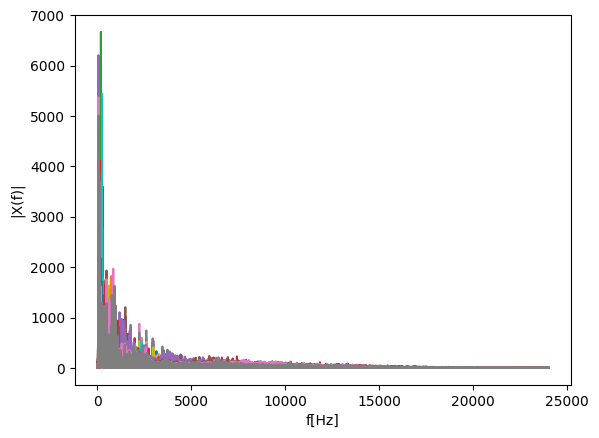

In [20]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

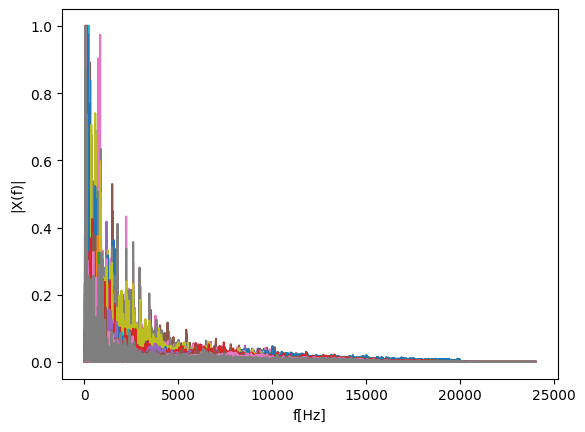

In [21]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()


In [27]:
from scipy.spatial.distance import cdist
import numpy as np

# Suponiendo que Xw_ y base_datos ya están definidos
Xw_.shape
distancias = cdist(base_datos, Xw_)
print("Distancias: ", distancias)
distancias.shape

# Calcular los índices después de imprimir las distancias
ind = np.argmin(distancias, axis=0)
print("indices: ", ind)

# Imprimir las canciones correspondientes a los índices
canciones = base_datos[ind]
print("canciones ", canciones)

# Iterar sobre los índices y obtener los géneros correspondientes
for i in range(len(ind)):
    print(genero_bd[ind[i]])

print("Forma de 'ind': ", ind.shape)


Distancias:  [[6.65187878 6.21331613 4.52806246 ... 6.89657995 6.48320883 6.88156154]
 [6.60769869 5.85037301 4.99139616 ... 6.20914744 6.00968126 5.99653584]
 [7.23524501 7.10730549 6.9221368  ... 7.44077697 7.38045038 7.30393174]
 ...
 [6.67436778 5.97506643 5.38230577 ... 6.02563816 5.72732587 5.98781061]
 [8.33518019 8.35708945 8.5227379  ... 7.94490915 7.90531118 7.79559428]
 [7.22651581 6.91484565 6.70785355 ... 6.70340699 6.62304165 6.60122249]]
indices:  [70 71 72 73 74 75 76 56 57 58 59 60 61 62 14 15 16 17 18 19 20 91 92 93
 94 95 96 97]
canciones  [[8.19810828e-03 3.26606295e-03 4.36513100e-03 ... 8.57461763e-06
  1.00456548e-05 9.74458496e-06]
 [1.59582058e-02 9.00041995e-03 7.49286806e-03 ... 1.91880533e-05
  1.94201516e-05 1.98200578e-05]
 [5.11682933e-03 7.02967874e-03 2.40597233e-03 ... 2.40532883e-05
  2.41023683e-05 2.41173883e-05]
 ...
 [5.59809184e-04 1.43328570e-03 2.11889083e-03 ... 1.71399167e-06
  3.10479517e-06 4.71257341e-06]
 [4.23792273e-03 2.22791727e-03 8.